In [93]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
import seaborn as sns
import eli5

In [2]:
from utils import load_and_fillna, pca_prep, run_random_forest

In [3]:
from sklearn.model_selection import train_test_split
def extract_features(df):
    features = list(df.columns[:-1])
    y = df['Target']
    X = df[features]
    return X,y

def split_data(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)
    return X_train, X_test, y_train, y_test

In [7]:
LUAD_CNV = pd.read_pickle("data/LUAD_CNV.pkl")
LUSC_CNV = pd.read_pickle("data/LUSC_CNV.pkl")

In [13]:
LUAD_CNV.shape

(556, 19729)

In [14]:
LUAD_CNV.describe()

Gene Symbol,ENSG00000008128.21,ENSG00000008130.14,ENSG00000067606.14,ENSG00000078369.16,ENSG00000078808.15,ENSG00000107404.16,ENSG00000116151.12,ENSG00000127054.17,ENSG00000131584.17,ENSG00000131591.16,...,ENSG00000268651.2,ENSG00000274183.1,ENSG00000274791.1,ENSG00000277150.1,ENSG00000277203.1,ENSG00000277745.1,ENSG00000277858.1,ENSG00000124333.13,ENSG00000124334.15,ENSG00000168939.9
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,...,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000
mean,0.021583,0.023381,0.025180,0.026978,0.028777,0.030576,0.032374,0.034173,0.035971,0.037770,...,35.562950,35.564748,35.566547,35.568345,35.570144,35.571942,35.573741,35.571942,35.573741,35.575540
std,0.364509,0.366862,0.374039,0.385772,0.401662,0.421238,0.444014,0.469523,0.497345,0.527115,...,836.267823,836.310232,836.352642,836.395051,836.437461,836.479870,836.522280,836.564838,836.607247,836.649657
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,...,19719.000000,19720.000000,19721.000000,19722.000000,19723.000000,19724.000000,19725.000000,19726.000000,19727.000000,19728.000000


In [15]:
LUAD_CNV["Target"] = 1
LUSC_CNV["Target"] = 2
df = pd.concat([LUAD_CNV,LUSC_CNV])

In [17]:
from sklearn.feature_selection import VarianceThreshold
thresholder = VarianceThreshold()
df_variance = thresholder.fit_transform(df)
df_variance.shape

(1081, 19730)

In [19]:
X, y = extract_features(df)
X_train, X_test, y_train, y_test = split_data(X, y)
feature_names = list(X.columns)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(random_state=42).fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("LR Accuracy: ", accuracy_score(y_test, y_pred))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR Accuracy:  0.7788018433179723


In [49]:
principalCompLUAD = pca_prep(LUAD_CNV, 5)
principalCompLUSC = pca_prep(LUSC_CNV, 5)
principalCompLUAD['Target'] = '0'
principalCompLUSC['Target'] = '1'
lungCNV = pd.concat([principalCompLUAD,principalCompLUSC])

In [26]:
X, y = extract_features(lungCNV)
X_train, X_test, y_train, y_test = split_data(X, y)
feature_names = list(X.columns)

In [28]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("SVM Accuracy: ", accuracy_score(y_test, y_pred))

SVM Accuracy:  0.5


In [34]:
LUAD = pd.read_pickle("data/LUAD.pkl")
LUSC = pd.read_pickle("data/LUSC.pkl")

In [53]:
princCompLUAD = pca_prep(LUAD, 5)
princCompLUSC = pca_prep(LUSC, 5)
princCompLUAD['Target'] = '0'
princCompLUSC['Target'] = '1'
lungGE = pd.concat([princCompLUAD,princCompLUSC])

Training Features Shape: (8, 19729)
Training Labels Shape: (8,)
Testing Features Shape: (2, 19729)
Testing Labels Shape: (2,)
Index(['PC-1', 'PC-1', 'PC-3', 'PC-3', 'PC-5', 'PC-5', 'PC-4', 'PC-2'], dtype='object')
Training the model


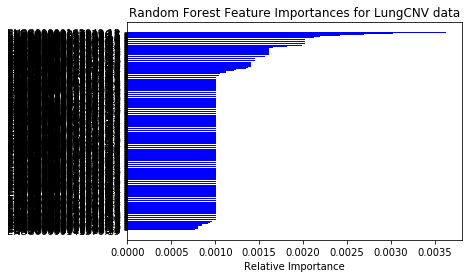

Top 500 features: ['ENSG00000162949.15', 'ENSG00000157916.17', 'ENSG00000270136.4', 'ENSG00000159423.15', 'ENSG00000205090.7', 'ENSG00000088280.17', 'ENSG00000115657.11', 'ENSG00000279244.1', 'ENSG00000118197.12', 'ENSG00000173372.15', 'ENSG00000053372.4', 'ENSG00000169991.9', 'ENSG00000204219.8', 'ENSG00000184163.3', 'ENSG00000117640.16', 'ENSG00000177674.14', 'ENSG00000196581.9', 'ENSG00000048707.12', 'ENSG00000227868.5', 'ENSG00000118960.11', 'ENSG00000187600.11', 'ENSG00000204464.6', 'ENSG00000055070.15', 'ENSG00000068912.12', 'ENSG00000154429.9', 'ENSG00000011523.12', 'ENSG00000138069.15', 'ENSG00000204624.7', 'ENSG00000173436.12', 'ENSG00000214336.4', 'ENSG00000171824.12', 'ENSG00000130255.11', 'ENSG00000237847.2', 'ENSG00000049247.12', 'ENSG00000174792.9', 'ENSG00000197880.7', 'ENSG00000116237.14', 'ENSG00000184908.16', 'ENSG00000255054.3', 'ENSG00000116752.5', 'ENSG00000186510.10', 'ENSG00000078140.12', 'ENSG00000169679.13', 'ENSG00000164574.14', 'ENSG00000125551.17', 'ENSG0000

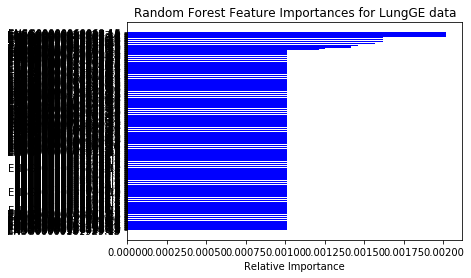

Top 500 features: ['ENSG00000060069.15', 'ENSG00000001497.15', 'ENSG00000011007.11', 'ENSG00000109814.10', 'ENSG00000162377.5', 'ENSG00000022976.14', 'ENSG00000186862.16', 'ENSG00000087460.22', 'ENSG00000006747.13', 'ENSG00000070081.14', 'ENSG00000214248.2', 'ENSG00000242770.2', 'ENSG00000011600.10', 'ENSG00000179520.9', 'ENSG00000032742.16', 'ENSG00000197702.10', 'ENSG00000138399.16', 'ENSG00000163734.4', 'ENSG00000110090.11', 'ENSG00000036473.6', 'ENSG00000006327.12', 'ENSG00000154930.13', 'ENSG00000073605.17', 'ENSG00000042493.14', 'ENSG00000066230.9', 'ENSG00000196289.6', 'ENSG00000108055.9', 'ENSG00000100884.8', 'ENSG00000180447.6', 'ENSG00000076650.5', 'ENSG00000066379.13', 'ENSG00000251884.1', 'ENSG00000082497.10', 'ENSG00000013288.7', 'ENSG00000000003.13', 'ENSG00000011052.20', 'ENSG00000068489.11', 'ENSG00000060339.12', 'ENSG00000059145.17', 'ENSG00000049249.7', 'ENSG00000071462.10', 'ENSG00000000457.12', 'ENSG00000213386.3', 'ENSG00000168992.4', 'ENSG00000269220.1', 'ENSG0000

In [54]:
lungCNV_import = run_random_forest(df=lungCNV, random_state=42, n_estimators=1000, n_importance=500, name="LungCNV")
lungGE_import = run_random_forest(df=lungGE, random_state=42, n_estimators=1000, n_importance=500, name="LungGE")

In [64]:
num_features = [30, 50, 100, 150, 300]
# num_features = [30, 50, 100, 150, 200, 300, 400, 500]
for n in num_features:
    intersect = set(lungCNV_import[:n]).intersection(set(lungGE_import[:n]))
    if len(intersect) >0:
        print("CNV intersection GE : ", intersect)
        break

CNV intersection GE :  {'ENSG00000100099.19', 'ENSG00000049247.12', 'ENSG00000116704.7', 'ENSG00000106331.13'}


# Top 200 features intersect gave: ENSG00000116704.7, ENSG00000100099.19. Top 300 gave these additions: ENSG00000049247.12, ENSG00000106331.13

In [76]:
# Lung CNV test train split
X, y = extract_features(df)
X_train, X_test, y_train, y_test = split_data(X, y)
feature_names = list(X.columns)

In [103]:
# Lung GE test train split
LUAD = pd.read_pickle("data/LUAD.pkl")
LUSC = pd.read_pickle("data/LUSC.pkl")
LUAD["Target"] = 1
LUSC["Target"] = 2
df_GE = pd.concat([LUAD,LUSC])

Xge, yge = extract_features(df_GE)
Xge_train, Xge_test, yge_train, yge_test = split_data(Xge, yge)
feature_names_ge = list(Xge.columns)

In [77]:
import joblib
from os.path import exists
import train
dataname = "LUSCLUAD_CNV"
if not exists(f"models/{dataname}_LR.mdl"):
    train.run_logistic_regression(X_train, X_test, y_train, y_test, dataname)
if not exists(f"models/{dataname}_SVM.mdl"):
    train.run_svm(X_train, X_test, y_train, y_test, dataname)
if not exists(f"models/{dataname}_DT.mdl"):
    train.run_decision_trees(X_train, X_test, y_train, y_test, dataname)
if not exists(f"models/{dataname}_RF.mdl"):
    train.run_random_forest(X_train, X_test, y_train, y_test, dataname)
if not exists(f"models/{dataname}_XGB.mdl"):
    train.run_xgboost(X_train, X_test, y_train, y_test, dataname)

Starting Logistic Regression
{'model__C': 1.5}
0.7719907407407407
Done training, model saved to model/LUSCLUAD_CNV_LR.mdl
Starting SVM
{'model__C': 0.001, 'model__gamma': 0.001}
0.7870370370370371
Done training, model saved to model/LUSCLUAD_CNV_SVM.mdl
Starting Decision Trees
{'model__max_depth': 3, 'model__min_samples_split': 5}
0.7372685185185185
Done training, model saved to model/LUSCLUAD_CNV_DT.mdl
Starting Random Forest
{'model__max_depth': 15, 'model__min_samples_split': 5}
0.7881944444444444
Done training, model saved to model/LUSCLUAD_CNV_RF.mdl
Starting XGBoost


exception calling callback for <Future at 0x162aabc10 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/usr/local/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/usr/local/lib/python3.7/site-packages/joblib/parallel.py", line 768, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/usr/local/lib/python3.7/site-packages/joblib/parallel.py", line 834, in dispatch_one_batch
    self._dispatch(tasks)
  File "/usr/local/lib/python3.7/site-packages/joblib/parallel.py", line 753, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/usr/local/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 543, in apply_async
    future = self._workers.submit(SafeFunction(func))
  File "/usr/local/lib/pyt

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGABRT(-6)}

In [81]:
dataname = "LUSCLUAD_CNV"
rf_model_CNV = joblib.load(f"models/{dataname}_RF.mdl")
lr_model_CNV = joblib.load(f"models/{dataname}_LR.mdl")
dt_model_CNV = joblib.load(f"models/{dataname}_DT.mdl")
svm_model_CNV = joblib.load(f"models/{dataname}_SVM.mdl")
# xgb_model_CNV = joblib.load(f"models/{dataname}_XGB.mdl")

In [106]:
dataname = "LUSCLUAD"
rf_model_GE = joblib.load(f"models/{dataname}_RF.mdl")
lr_model_GE = joblib.load(f"models/{dataname}_LR.mdl")
dt_model_GE = joblib.load(f"models/{dataname}_DT.mdl")
svm_model_GE = joblib.load(f"models/{dataname}_SVM.mdl")
xgb_model_GE = joblib.load(f"models/{dataname}_XGB.mdl")

In [155]:
x = eli5.explain_weights(rf_model_CNV.named_steps["model"], feature_names=feature_names, top=300)
features = eli5.format_as_text(x, show= ('targets', 'feature_importances'))
features.split("/n")

['0.0066 ± 0.0774  ENSG00000163872.14\n0.0051 ± 0.0694  ENSG00000114796.14\n0.0050 ± 0.0705  ENSG00000214160.8\n0.0049 ± 0.0631  ENSG00000186038.8\n0.0044 ± 0.0611  ENSG00000161203.12\n0.0044 ± 0.0626  ENSG00000078081.6\n0.0044 ± 0.0636  ENSG00000161204.10\n0.0044 ± 0.0590  ENSG00000205981.5\n0.0042 ± 0.0617  ENSG00000244405.6\n0.0041 ± 0.0568  ENSG00000113790.9\n0.0039 ± 0.0526  ENSG00000172667.9\n0.0039 ± 0.0531  ENSG00000171109.17\n0.0036 ± 0.0595  ENSG00000090539.14\n0.0035 ± 0.0434  ENSG00000181449.3\n0.0034 ± 0.0467  ENSG00000114503.9\n0.0033 ± 0.0533  ENSG00000177383.4\n0.0033 ± 0.0551  ENSG00000053524.10\n0.0032 ± 0.0479  ENSG00000145016.12\n0.0032 ± 0.0427  ENSG00000145075.10\n0.0032 ± 0.0541  ENSG00000187068.2\n0.0031 ± 0.0568  ENSG00000043093.12\n0.0030 ± 0.0524  ENSG00000090530.8\n0.0030 ± 0.0485  ENSG00000184203.6\n0.0029 ± 0.0468  ENSG00000113889.10\n0.0028 ± 0.0450  ENSG00000188958.8\n0.0028 ± 0.0518  ENSG00000175193.11\n0.0028 ± 0.0449  ENSG00000163923.8\n0.0028 ± 0.054

In [139]:
eli5.show_weights(rf_model.named_steps["model"], feature_names=feature_names_ge, top=300, show=List[‘feature_importances’]) 


SyntaxError: invalid character in identifier (<ipython-input-139-e8c6b29d1d9c>, line 4)

In [141]:
# feats = rf_model.named_steps["model"].feature_importances_
# print(feats)

[0.00000000e+00 0.00000000e+00 1.97600880e-05 ... 0.00000000e+00
 0.00000000e+00 3.94243386e-05]


In [142]:
from eli5.sklearn import PermutationImportance

permCNV = PermutationImportance(rf_model_CNV, random_state=42).fit(X_train, y_train)
features = permCNV.feature_importances_
print(features)


KeyboardInterrupt: 

In [84]:
num_features = [30, 50, 100, 150, 300, 400, 500]
# num_features = [30, 50, 100, 150, 200, 300, 400, 500]
for n in num_features:
    intersect = set(rf_model_CNV[:n]).intersection(set(rf_model[:n]))
    if len(intersect) >0:
        print("CNV intersection GE : ", intersect)
        break